# Funciones iniciales

In [ ]:
import os
import subprocess
import platform
import shutil
import urllib.request
import tarfile

def is_java_installed():
    try:
        output = subprocess.check_output(['java', '-version'], stderr=subprocess.STDOUT)
        print(output.decode())
        return True
    except Exception as e:
        print(e)
        return False

if is_java_installed():
    print("Java is installed")
else:
    print("Java is not installed")


def setup_spark_nlp(base_path=r'C:'):
    """
    Sets up Spark NLP with Spark 3.2.3 on Windows.
    :param base_path: base path for installation (optional)
    """
    # Step 1: descargar e installar Adopt OpenJDK 1.8
    # Este paso no puede ser automatizado y debe ser realizado manualmente. 
    
    # Step 2: Descargar pre-compiled Hadoop binaries
    hadoop_bin_url = 'https://github.com/cdarlint/winutils/raw/master/hadoop-3.2.0/bin/'
    hadoop_bin_dir = os.path.join(base_path, 'hadoop', 'bin')
    os.makedirs(hadoop_bin_dir, exist_ok=True)

    for file in ['winutils.exe', 'hadoop.dll']:
        urllib.request.urlretrieve(hadoop_bin_url + file, os.path.join(hadoop_bin_dir, file))

    # Step 3: Descargar Apache Spark 3.2.3

    spark_url = 'https://archive.apache.org/dist/spark/spark-3.2.3/spark-3.2.3-bin-hadoop3.2.tgz'
    spark_dir = os.path.join(base_path, 'spark')

    with urllib.request.urlopen(spark_url) as response:
        with open('spark.tgz', 'wb') as f:
            shutil.copyfileobj(response, f)

    with tarfile.open('spark.tgz', 'r:gz') as tf:
        tf.extractall(spark_dir)

    # Step 4: Set environment variables 
    os.environ['HADOOP_HOME'] = os.path.join(base_path, 'hadoop','bin')
    os.environ['SPARK_HOME'] = spark_dir

    # Step 5: Add to PATH environment variable
    os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HADOOP_HOME'], 'bin')
    os.environ['PATH'] += os.pathsep + os.path.join(os.environ['SPARK_HOME'], 'bin')

    # Step 6: Install Microsoft Visual C++ 2010 Redistributed Package (x64)
    # This step cannot be automated and must be done manually.

    # Step 7: Create folders C:\tmp and C:\tmp\hive
    os.makedirs(os.path.join(base_path, 'tmp', 'hive'), exist_ok=True)

    # Change permissions for C:\tmp and C:\tmp\hive
    winutils = os.path.join(os.environ['HADOOP_HOME'], 'bin', 'winutils.exe')
    os.system(f'{winutils} chmod 777 /tmp/hive')
    os.system(f'{winutils} chmod 777 /tmp/')


def setup(pyspark_version="3.2.3", sparknlp_version="4.4.2"):
    """
    Configura el entorno de Google Colab con PySpark y Spark NLP.
    :param pyspark_version: versión de PySpark a instalar (opcional)
    :param sparknlp_version: versión de Spark NLP a instalar (opcional)
    """
    if 'dbutils' in globals():
        print("Este notebook se está ejecutando en Databricks, sigue los siguientes pasos para configurarlo si no lo has hecho ya") 
        data = [["Paso", "Descripción"],
        ["1", "Configurar `spark.kryoserializer.buffer.max` a `2000M` y `spark.serializer` a `org.apache.spark.serializer.KryoSerializer`"],
        ["2", "En la pestaña de Bibliotecas dentro de tu clúster, sigue estos pasos:"],
        ["3.1", "Instalar nuevo -> PyPI -> spark-nlp -> Instalar"],
        ["3.2", "Instalar nuevo -> Maven -> Coordenadas -> com.johnsnowlabs.nlp:spark-nlp_2.12:4.4.3"]]
        for row in data:
            print("{: <5} {: <10}".format(*row))
        return
    elif platform.system() == 'Linux':
        os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
        print(f"Instalando PySpark {pyspark_version} y Spark NLP {sparknlp_version}")
        if 'NVIDIA' in subprocess.getoutput('nvidia-smi'):
            print("Actualizando libcudnn8 a 8.1.0 para GPU")
            !apt install -qq --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2 -y &> /dev/null
        !pip install --upgrade -q pyspark==$pyspark_version spark-nlp==$sparknlp_version findspark

    elif platform.system() == 'Windows':
        print(f"Instalando PySpark {pyspark_version} y Spark NLP {sparknlp_version}")
        !pip install --upgrade -q pyspark==$pyspark_version spark-nlp==$sparknlp_version findspark
        # SOLO EJECUTAR 1 VEZ 
        setup_spark_nlp(os.path.join(os.getcwd(),"ARCHIVOS_BASE"))

setup()

openjdk version "1.8.0_345"
OpenJDK Runtime Environment (Zulu 8.64.0.19-CA-linux64) (build 1.8.0_345-b01)
OpenJDK 64-Bit Server VM (Zulu 8.64.0.19-CA-linux64) (build 25.345-b01, mixed mode)

Java is installed
Este notebook se está ejecutando en Databricks, sigue los siguientes pasos para configurarlo si no lo has hecho ya
Paso  Descripción
1     Configurar `spark.kryoserializer.buffer.max` a `2000M` y `spark.serializer` a `org.apache.spark.serializer.KryoSerializer`
2     En la pestaña de Bibliotecas dentro de tu clúster, sigue estos pasos:
3.1   Instalar nuevo -> PyPI -> spark-nlp -> Instalar
3.2   Instalar nuevo -> Maven -> Coordenadas -> com.johnsnowlabs.nlp:spark-nlp_2.12:4.4.3


In [ ]:
# [Environment]::SetEnvironmentVariable("HADOOP_HOME", "C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin", "User")
# [Environment]::SetEnvironmentVariable("SPARK_HOME", "C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin", "User")


# $CurrentValue = [Environment]::GetEnvironmentVariable("PATH", "User")
# [Environment]::SetEnvironmentVariable("PATH", $CurrentValue + ";C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin", "User")

# $CurrentValue = [Environment]::GetEnvironmentVariable("PATH", "User")
# [Environment]::SetEnvironmentVariable("PATH", $CurrentValue + ";C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin", "User")



In [ ]:
# os.environ["HADOOP_HOME"] = r"C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin"


# os.environ["SPARK_HOME"] = r"C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin"



# # Add to PATH environment variable
# os.environ['PATH'] += os.pathsep + os.path.join(os.environ['HADOOP_HOME'])
# os.environ['PATH'] += os.pathsep + os.path.join(os.environ['SPARK_HOME'])

# %%cmd
# setx PATH %PATH%;"C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin"
# setx HADOOP_HOME "C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\hadoop\bin"
# setx PATH %PATH%;"C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin"
# setx SPARK_HOME  "C:\Users\RomanGu\OneDrive - BASF\Documents\CODE\romangu-repo\notebooks\TFM\experimentos\ARCHIVOS_BASE\spark\spark-3.2.3-bin-hadoop3.2\bin"
# abrir enviroment variables desde powershell: & "$env:SystemRoot\System32\SystemPropertiesAdvanced.exe"

for environ in ["HADOOP_HOME","SPARK_HOME","JAVA_HOME"]:
    try:
        print(environ,os.environ[environ])
    except:
        print(environ, "no está configurada")





HADOOP_HOME no está configurada
SPARK_HOME /databricks/spark
JAVA_HOME /usr/lib/jvm/zulu8-ca-amd64/jre/


In [ ]:
import sparknlp
import torch

if 'dbutils' not in globals():
    spark = sparknlp.start(gpu = torch.cuda.is_available())

print("Spark NLP version: {}".format(sparknlp.version()))
print("Apache Spark version: {}".format(spark.version))


Spark NLP version: 4.4.3
Apache Spark version: 3.3.0


In [ ]:
# Importing necessary libraries
from sparknlp.pretrained import PretrainedPipeline
# from sparknlp.base import LightPipeline,document_assembler
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from pyspark.sql.functions import countDistinct, col
import pyspark.sql.functions as F
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

# Setting up inline plotting and figure format
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Setting up seaborn style and color palette
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

# Setting up figure size for plots
rcParams['figure.figsize'] = 12, 8


In [ ]:
def experimento(tipo: str, idioma: str):
    """
    Configura y devuelve los parámetros para un experimento.

    Parámetros
    ----------
    tipo : str
        El tipo de experimento a realizar. Debe ser "AMAZON" o "AGNEWS".
    idioma : str
        El idioma del modelo pre-entrenado a utilizar. Debe ser "EN" o "ES".

    Devoluciones
    -------
    int
        El tamaño del lote a utilizar en el experimento.
    int
        El número de épocas a utilizar en el experimento.
    float
        La tasa de aprendizaje a utilizar en el experimento.
    str
        El nombre del modelo pre-entrenado a utilizar en el experimento.

    """
    
    experiment_params = {
        "AMAZON": (16, 2, 5e-5),
        "AGNEWS": (32, 4, 3e-5)
    }
    
    model_names = {
        "ES": 'bert_base_multilingual_cased',
        "EN": 'bert_uncased_L-4_H-256_A-4_squad2',
    }
    
    if tipo.upper() not in experiment_params:
        print("elige experimento")
        return
    
    if idioma.upper() not in model_names:
        print("modelo no elegido")
        return
    
    BATCH_SIZE, EPOCHS, LEARNING_RATE = experiment_params[tipo.upper()]
    PRE_TRAINED_MODEL_NAME = model_names[idioma.upper()]
    
    return BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME


BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME = experimento(tipo = "AMAZON", idioma ="es")

# En spark NLP - tamaños para los BERT models

Modelos elegidos:
* Para el modelo de respuesta en inglés [bert_uncased_L-4_H-256_A-4_squad2](https://sparknlp.org/2022/06/02/bert_qa_bert_uncased_L_4_H_256_A_4_squad2_en_3_0.html) 
  * el más parecido a [google/bert_uncased_L-4_H-256_A-4](https://huggingface.co/google/bert_uncased_L-4_H-256_A-4)
* para el modelo de clasificación en español si está el mismo modelo de HugginFace  [bert_base_multilingual_cased](https://sparknlp.org/2021/05/20/bert_base_multilingual_cased_xx.html)

<!-- Original values
* PRE_TRAINED_MODEL_NAME = 'bert_base_cased'  **389.1 MB**
* PRE_TRAINED_MODEL_NAME = 'sent_small_bert_L8_512' **149.1 MB**
* PRE_TRAINED_MODEL_NAME = 'small_bert_L4_256' **40.5 MB**

Para sentence embeddings.
SENTENCE_PRE_TRAINED_MODEL_NAME = 'sent_bert_base_cased'
SENTENCE_PRE_TRAINED_MODEL_NAME = 'sent_small_bert_L8_512' **149.1 MB** -->

Fuente: [NLP MODELS EN SPARK-NLP](https://nlp.johnsnowlabs.com/models)

In [ ]:
# Para las Sentence embeddings el nombre del moldelo lleva un prefijo "sent_"
SENTENCE_PRE_TRAINED_MODEL_NAME = 'sent_'+PRE_TRAINED_MODEL_NAME

# Random Seed 
RANDOM_SEED = 42


print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"LEARNING_RATE: {LEARNING_RATE}")
print(f"EPOCHS: {EPOCHS}")
print(f"PRE_TRAINED_MODEL_NAME: {PRE_TRAINED_MODEL_NAME}")
print(f"PRE_TRAINED_MODEL_NAME FOR SENTENCES: {SENTENCE_PRE_TRAINED_MODEL_NAME}")

BATCH_SIZE: 16
LEARNING_RATE: 5e-05
EPOCHS: 2
PRE_TRAINED_MODEL_NAME: bert_base_multilingual_cased
PRE_TRAINED_MODEL_NAME FOR SENTENCES: sent_bert_base_multilingual_cased


In [ ]:
!pip install awscli -qq


if 'dbutils' in globals():
    root_folder = os.path.join("/dbfs/mnt/edl/data/testing/trs_test","sample_data/")
else:
    root_folder = "./sample_data/"
print(root_folder)


# if not os.path.isfile(os.path.join(root_folder,'dataset_es_test.json')):
#     !aws s3 cp s3://amazon-reviews-ml/json/test/dataset_es_test.json {root_folder} --no-sign-request
# if not os.path.isfile(os.path.join(root_folder,'dataset_es_train.json')):
#     !aws s3 cp s3://amazon-reviews-ml/json/train/dataset_es_train.json {root_folder} --no-sign-request

import subprocess

def download_files(root_folder):
    """
    Descarga los archivos dataset_es_test.json y dataset_es_train.json desde Amazon S3.
    :param root_folder: ruta de la carpeta donde se guardarán los archivos descargados
    """
 
    if not os.path.isfile(os.path.join(root_folder,'dataset_es_test.json')):
        print("descargando test en",root_folder)
        subprocess.run(f"aws s3 cp s3://amazon-reviews-ml/json/test/dataset_es_test.json {root_folder} --no-sign-request", shell=True)
    
    if not os.path.isfile(os.path.join(root_folder,'dataset_es_train.json')):
        print("descargando train en",root_folder)
        subprocess.run(f"aws s3 cp s3://amazon-reviews-ml/json/train/dataset_es_train.json {root_folder} --no-sign-request", shell=True)

download_files(root_folder)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.21.18 requires botocore<1.25.0,>=1.24.18, but you have botocore 1.29.141 which is incompatible.
boto3 1.21.18 requires s3transfer<0.6.0,>=0.5.0, but you have s3transfer 0.6.1 which is incompatible.
/dbfs/mnt/edl/data/testing/trs_test/sample_data/


In [ ]:
if 'dbutils' in globals():
    spark.createDataFrame(dbutils.fs.ls(root_folder.lstrip("/dbfs"))).show(truncate=False)
else:
    os.listdir(root_folder)

+---------------------------------------------------------------------+---------------------+--------+----------------+
|path                                                                 |name                 |size    |modificationTime|
+---------------------------------------------------------------------+---------------------+--------+----------------+
|dbfs:/mnt/edl/data/testing/trs_test/sample_data/dataset_es_test.json |dataset_es_test.json |1939602 |1685049712000   |
|dbfs:/mnt/edl/data/testing/trs_test/sample_data/dataset_es_train.json|dataset_es_train.json|77475023|1685050480000   |
+---------------------------------------------------------------------+---------------------+--------+----------------+



In [ ]:
traindata = os.path.join(root_folder, "dataset_es_train.json")
testdata = os.path.join(root_folder, "dataset_es_test.json") 
if 'dbutils' in globals():
    traindata = traindata.replace("/dbfs","")
    testdata = testdata.replace("/dbfs","")
print(traindata)
print(testdata)

/mnt/edl/data/testing/trs_test/sample_data/dataset_es_train.json
/mnt/edl/data/testing/trs_test/sample_data/dataset_es_test.json


In [ ]:
if 'dbutils' in globals():
    !head /dbfs{traindata}
elif platform.system() == 'Linux':
    !head {traindata}
else:
    !powershell -command "gc {traindata} | select -first 10 # head"

{"review_id": "es_0491108", "product_id": "product_es_0296024", "reviewer_id": "reviewer_es_0999081", "stars": "1", "review_body": "Nada bueno se me fue ka pantalla en menos de 8 meses y no he recibido respuesta del fabricante", "review_title": "television Nevir", "language": "es", "product_category": "electronics"}
{"review_id": "es_0869872", "product_id": "product_es_0922286", "reviewer_id": "reviewer_es_0216771", "stars": "1", "review_body": "Horrible, nos tuvimos que comprar otro porque ni nosotros que sabemos ingl\u00e9s, ni un inform\u00e1tico, despu\u00e9s de una hora fue capaz de instalarlo", "review_title": "Dinero tirado a la basura con esta compra", "language": "es", "product_category": "electronics"}
{"review_id": "es_0811721", "product_id": "product_es_0474543", "reviewer_id": "reviewer_es_0929213", "stars": "1", "review_body": "Te obligan a comprar dos unidades y te llega solo una y no hay forma de reclamar, una autentica estafa, no compreis!!", "review_title": "solo lleg

In [ ]:
from pyspark.sql.functions import col, when
from pyspark.sql import SparkSession

df = spark.read.json(traindata).select(
    col("stars"), col("review_body").alias("description")
)
df_testdata = spark.read.json(testdata).select(
    col("stars"), col("review_body").alias("description")
)

print(
    "Tamaño total ", df.count(), len(df.columns)
)  # dataframe shape only exists in recent versions

df.show(10, truncate=False)

Tamaño total  200000 2
+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|stars|description                                                                                                                                                                                                                                                                                                                                              |
+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Creando las categorías del sentiment en base al numero de estrellas:
Este fragmento de código crea una nueva columna llamada "sentiment" en dos DataFrames `df` y `df_testdata`. La columna "sentiment" se llena con valores basados en la columna "stars" de cada DataFrame.

Para cada fila en el DataFrame `df`, si el valor en la columna "stars" está entre 0 y 2 (exclusivo), el valor correspondiente en la columna "sentiment" se establece en "negative". Si el valor en la columna "stars" es igual a 3, el valor correspondiente en la columna "sentiment" se establece en "neutral". Para todos los demás valores en la columna "stars", el valor correspondiente en la columna "sentiment" se establece en "positive".

El mismo proceso se aplica al DataFrame `df_testdata`.

Esto se logra utilizando la función `when` de spark, que toma una lista de condiciones y una lista de valores a seleccionar cuando se cumple cada condición. Si ninguna de las condiciones se cumple para un elemento dado, se selecciona el valor especificado por el parámetro `otherwise`.

In [ ]:
df = df.withColumn(
    "sentiment",
    when(df["stars"].between(0, 2), "negative")
    .when(df["stars"] == 3, "neutral")
    .otherwise("positive")
)

df_testdata = df_testdata.withColumn(
    "sentiment",
    when(df_testdata["stars"].between(0, 2), "negative")
    .when(df_testdata["stars"] == 3, "neutral")
    .otherwise("positive")
)

df_testdata.show(10,truncate=90)


+-----+------------------------------------------------------------------------------------------+---------+
|stars|                                                                               description|sentiment|
+-----+------------------------------------------------------------------------------------------+---------+
|    1|no me llego el articulo me lo mando por correos normal sin seguimiento y nunca me llego...| negative|
|    1|                                                     la mensajería horrible, no compro mas| negative|
|    1|Estoy muy decepcionado con el vendedor ya que el pedido no me llegó a tiempo y no cumpl...| negative|
|    1|Mi valoración no es sobre el producto sino sobre AMAZON. Ofrecéis el producto a 299€ y ...| negative|
|    1|Pues tenía interés en este libro y probé la versión kindle. se abre la portada pero nad...| negative|
|    1|Compre este teclado al ver sus buenos comentarios y apariencia pero al llegar a casa, l...| negative|
|    1|            

In [ ]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="sentiment", outputCol="category_encoded")
indexer_model = indexer.fit(df)
df = indexer_model.transform(df)
df_testdata = indexer_model.transform(df_testdata)


In [ ]:
# igualamos el numero de ocurrencias por categoria para no tener bias.
df_temp = df.filter(col("sentiment") == "negative").limit(40000) \
    .union(df.filter(col("sentiment") == "neutral").limit(40000)) \
    .union(df.filter(col("sentiment") == "positive").limit(40000))

df_testdata_temp = df_testdata.filter(col("sentiment") == "negative").limit(1000) \
    .union(df_testdata.filter(col("sentiment") == "neutral").limit(1000)) \
    .union(df_testdata.filter(col("sentiment") == "positive").limit(1000))

# reemplazamos los dataset uno con los datos, df para train y val, y df_testdata para la prueba "test"
df = df_temp
df_testdata = df_testdata_temp

df.groupBy("sentiment").count().filter(col("count") > 1).show()

+---------+-----+
|sentiment|count|
+---------+-----+
| negative|40000|
|  neutral|40000|
| positive|40000|
+---------+-----+



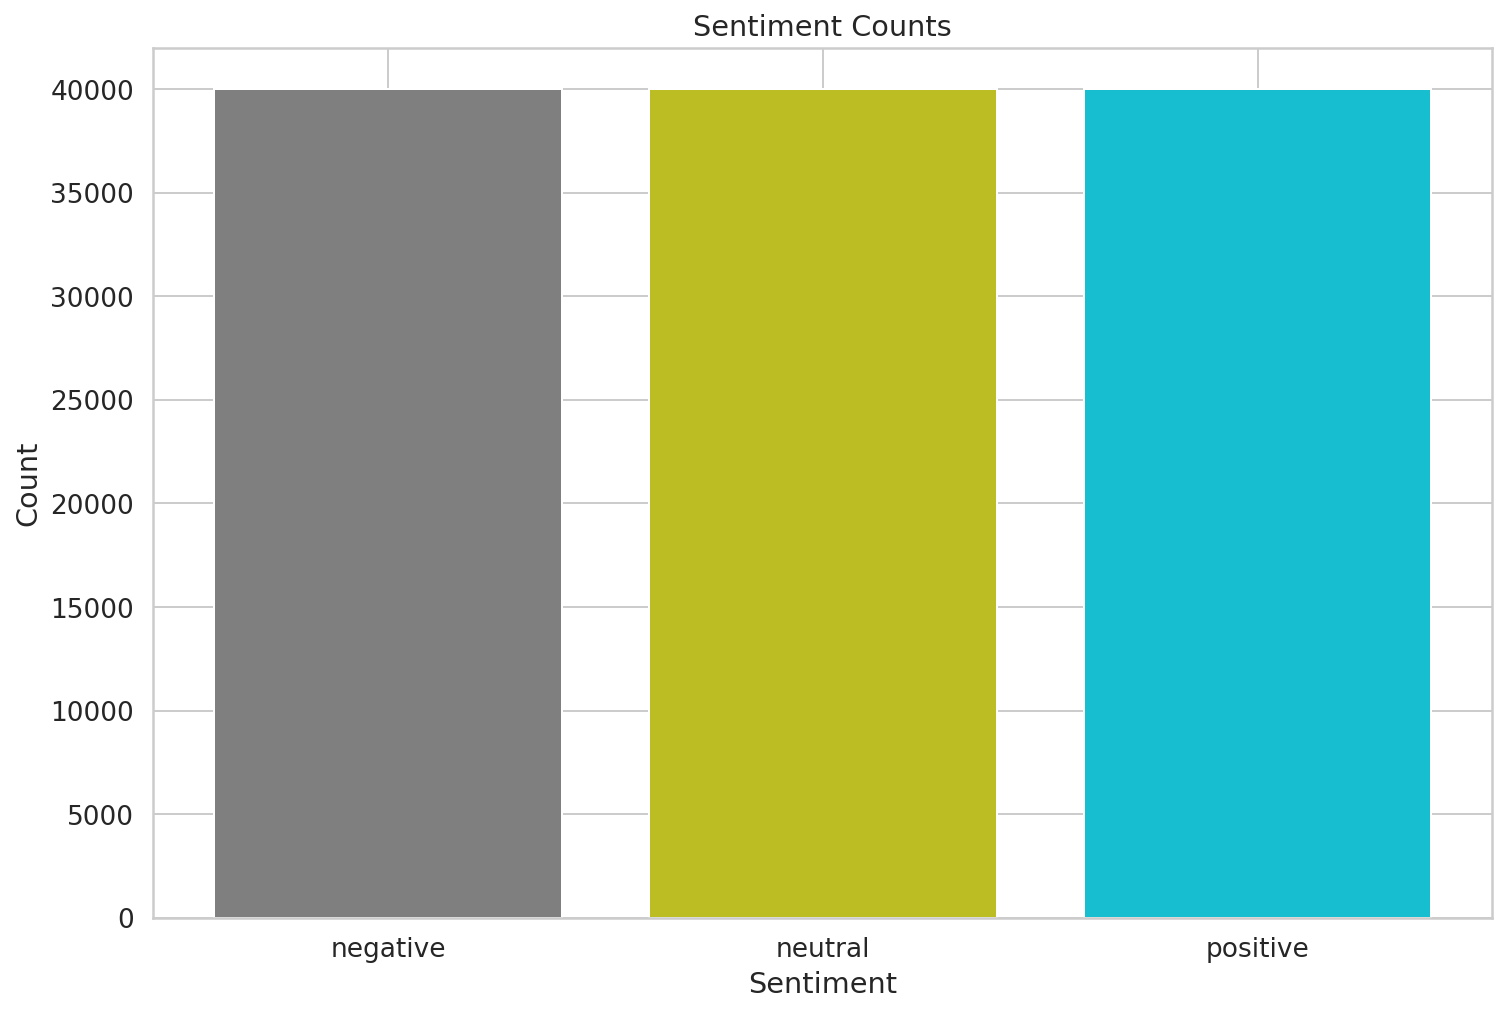

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupBy("sentiment").count().toPandas()

colors = [ "#7f7f7f", "#bcbd22", "#17becf", "#1a55FF", "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", ]

plt.bar(sentiment_counts["sentiment"], sentiment_counts["count"],color = colors)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Counts")
plt.show()

Explicación del naming en los modelos Bert de Spark NLP. 
* "L" indica qué capa de agrupación (pooling layer) se utiliza al producir las incrustaciones (embeddings) 
* "H" significa la dimensión de las embeddings devueltas.

Por ejemplo, si utilizamos `BertSentenceEmbeddings` con el valor `'sent_small_bert_L8_512'` significa que simplemente cargamos Bert Sentence Embeddings Small con dimensión L8 y 512 y lo usamos en lugar de USE. Como puede ver, es casi 8 veces más pequeño que el tamaño de USE con el poder de Bert.

El modelo se puede utilizar de manera offline si se desea, pero habría que descargarlo previamente. Para no incrementar el tamaño del repositorio dejamos a SPARK_NLP que lo baje automáticamente.


En el contexto del Procesamiento del Lenguaje Natural (NLP), USE significa **Universal Sentence Encoder**. Es una herramienta desarrollada por Google que convierte una cadena de palabras en vectores de 512 dimensiones. Estos vectores capturan el significado semántico de la secuencia de palabras en una oración y, por lo tanto, pueden usarse como entradas para otras tareas de NLP posteriores, como clasificación, medición de similitud semántica, etc .

A continuación se está construyendo un pipeline de procesamiento de Spark NLP. Primero, se está creando un `DocumentAssembler` para convertir la columna "review_body" en un documento y almacenarlo en la columna "document". Luego, se está creando un `Tokenizer` para dividir el documento en tokens y almacenarlos en la columna "token".

Después, se está utilizando `BertEmbeddings` para crear incrustaciones (embeddings) de palabras utilizando un modelo pre-entrenado especificado por `PRE_TRAINED_MODEL_NAME`. Estas incrustaciones se almacenan en la columna "embeddings".

A continuación, se está utilizando `SentenceEmbeddings` para calcular las incrustaciones de oraciones a partir de las incrustaciones de palabras utilizando un promedio y almacenarlas en la columna "sentence_embeddings".

Finalmente, se está creando un clasificador `ClassifierDLApproach` que utiliza las incrustaciones de oraciones como entrada para clasificar el sentimiento del texto. El clasificador se entrena durante un número especificado de épocas con una tasa de aprendizaje y tamaño de lote especificados.

Todo el pipeline se construye utilizando estas etapas y se almacena en la variable `bert_clf_pipeline`.

In [ ]:

document_assembler = DocumentAssembler() \
    .setInputCol("description") \
    .setOutputCol("document")
    
tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

# BertEmbeddings utiliza los datos de una red neuronal entrenada previamente (el nombre del modelo) para crear codificar las palabras que contiene cada texto 
# convirtiendo a vectores dichas palabras. (codificandolas) AQUI USE AL PRINCIPIO 'small_bert_L4_256'
bert_embeddings = BertEmbeddings().pretrained(name=PRE_TRAINED_MODEL_NAME, lang='xx') \
    .setInputCols(["document",'token'])\
    .setOutputCol("embeddings")
#
embeddingsSentence = SentenceEmbeddings() \
    .setInputCols(["document", "embeddings"]) \
    .setOutputCol("sentence_embeddings") \
    .setPoolingStrategy("AVERAGE")
# ClassifierDLApproach: ClassifierDL Utiliza el State-of-the-art de las Universal Sentence Encoder como input para iniciar clasificaciones de texto.
# es un clasificador que contiene casi 100 clases de tensorflow, usa modelos de deep learning DNN
# LR 5e-3f BATCHSIZE 8
classsifierdl = ClassifierDLApproach()\
    .setInputCols(["sentence_embeddings"])\
    .setOutputCol("class")\
    .setLabelColumn("sentiment")\
    .setMaxEpochs(EPOCHS)\
    .setLr(LEARNING_RATE)\
    .setBatchSize(BATCH_SIZE)\
    .setEnableOutputLogs(True)
    #.setOutputLogsPath('logs')

bert_clf_pipeline = Pipeline(stages=[
    document_assembler, 
    tokenizer,
    bert_embeddings,
    embeddingsSentence,
    classsifierdl
])

bert_base_multilingual_cased download started this may take some time.
Approximate size to download 636.6 MB
[OK!]


# Creación del train y val datasets

HAY QUE HACER ONE HOT ENCODING PARA PODER METERLO EN EL BERT

In [ ]:
df_train, df_eval = df.randomSplit([0.7, 0.3], seed=RANDOM_SEED)
for dataset in (df_train, df_eval):
  print(dataset.count())

84201
35799


# Ajuste del modelo (FIT)

In [ ]:
%%time
bert_Model = bert_clf_pipeline.fit(df_train)

CPU times: user 4.34 s, sys: 1.17 s, total: 5.51 s
Wall time: 1h 17min 34s


# Realización de predicciones en el conjunto de prueba
1. primero con una frase
2. con el dataset de test

In [ ]:
light_model = LightPipeline(bert_Model)

light_result = light_model.annotate("Este producto es un poco asqueroso, no me ha gustado nada")
print(light_result)

{'document': ['Este producto es un poco asqueroso, no me ha gustado nada'], 'sentence_embeddings': ['Este producto es un poco asqueroso, no me ha gustado nada'], 'token': ['Este', 'producto', 'es', 'un', 'poco', 'asqueroso', ',', 'no', 'me', 'ha', 'gustado', 'nada'], 'class': ['negative'], 'embeddings': ['Este', 'producto', 'es', 'un', 'poco', 'asqueroso', ',', 'no', 'me', 'ha', 'gustado', 'nada']}


In [ ]:
predict_bert = bert_Model.transform(df_testdata)
predict_bert.printSchema()

root
 |-- stars: string (nullable = true)
 |-- description: string (nullable = true)
 |-- sentiment: string (nullable = false)
 |-- category_encoded: double (nullable = false)
 |-- document: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    |    |-- metadata: map (nullable = true)
 |    |    |    |-- key: string
 |    |    |    |-- value: string (valueContainsNull = true)
 |    |    |-- embeddings: array (nullable = true)
 |    |    |    |-- element: float (containsNull = false)
 |-- token: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- annotatorType: string (nullable = true)
 |    |    |-- begin: integer (nullable = false)
 |    |    |-- end: integer (nullable = false)
 |    |    |-- result: string (nullable = true)
 |    

In [ ]:

from pyspark.sql.functions import explode
# predict_bert\
#   .select("sentiment","description","class.result")\
#   .withColumn("prediccion", 
#               when(df.result[0] == 0, ['negative'])
#               .when(df.result[0] == 1, ['neutral'])
#               .when(df.result[0] == 2, ['positive'])).show(10,truncate=80)
  

df_predict_bert = (predict_bert
  .select("sentiment","description",explode("class").alias("class"))
  .withColumn("result", col("class.result"))
  .select("sentiment","description","result")
  .drop_duplicates()
  
  )
df_predict_bert.show(10,truncate=80)


+---------+--------------------------------------------------------------------------------+--------+
|sentiment|                                                                     description|  result|
+---------+--------------------------------------------------------------------------------+--------+
| negative|                                           la mensajería horrible, no compro mas|negative|
| negative|La peor cámara que he tenido en mis manos. Dos veces la he tenido que reempla...|negative|
| negative|no lo volvería a comprar, no le he encontrado ninguna utilidad, no es lo que ...|negative|
| negative|Compre este teclado al ver sus buenos comentarios y apariencia pero al llegar...|negative|
| negative|Pues tenía interés en este libro y probé la versión kindle. se abre la portad...|negative|
| negative|Estoy muy decepcionado con el vendedor ya que el pedido no me llegó a tiempo ...|negative|
| negative|                                               Sigue sin llegar después

# Obtenemos el rendimiento del modelo para comparar con la opcion de USE

In [ ]:

df_pandas_predict_bert = df_predict_bert.toPandas()


class_names = ['negative', 'neutral', 'positive']

print(classification_report(df_pandas_predict_bert.sentiment, df_pandas_predict_bert.result,target_names=class_names))
print(accuracy_score(df_pandas_predict_bert.sentiment, df_pandas_predict_bert.result))

              precision    recall  f1-score   support

    negative       0.67      0.76      0.71      1000
     neutral       0.50      0.43      0.46      1000
    positive       0.60      0.61      0.60       999

    accuracy                           0.60      2999
   macro avg       0.59      0.60      0.59      2999
weighted avg       0.59      0.60      0.59      2999

0.5981993997999333


# Dreamos la matriz de confusion
1

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

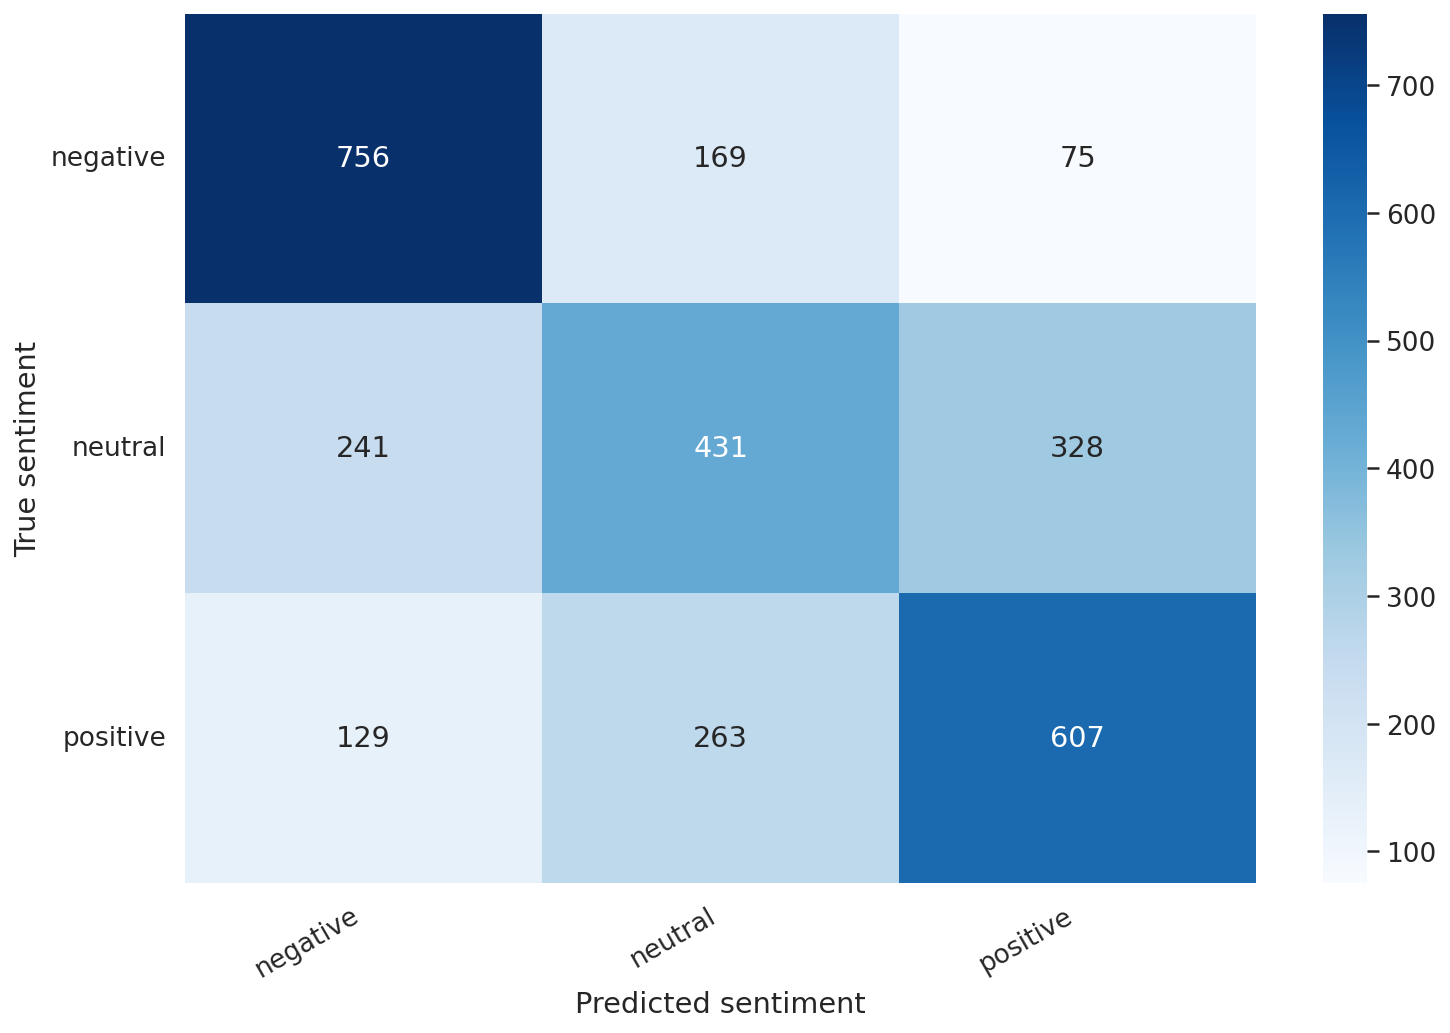

In [ ]:
    import pandas as pd
    cm = confusion_matrix(df_pandas_predict_bert.sentiment, df_pandas_predict_bert.result)
    df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
    show_confusion_matrix(df_cm)

Pruebas de predicción

In [ ]:
light_model.annotate(
    "Me encanta, lo recomendaría al 100%, no se como no se lo han comprado antes."
)["class"]

Out[31]: ['negative']

Enlaces relacionados bibliografía organizada en formato markdown:

- [Annotators SparkNLP](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/5.Text_Classification_with_ClassifierDL.ipynb)
- [Opciones de preprocesado](https://github.com/JohnSnowLabs/spark-nlp-workshop/blob/master/tutorials/Certification_Trainings/Public/2.Text_Preprocessing_with_SparkNLP_Annotators_Transformers.ipynb)
- [Clasificación de texto en Spark NLP con Bert y Universal Sentence Encoders](https://towardsdatascience.com/text-classification-in-spark-nlp-with-bert-and-universal-sentence-encoders-e644d618ca32)
- [Cómo instalar Spark NLP offline](https://nlp.johnsnowlabs.com/docs/en/install#offline)
- [Predicción de reseñas de películas con Bert en TF Hub (Python)](https://colab.research.google.com/github/google-research/bert/blob/master/predicting_movie_reviews_with_bert_on_tf_hub.ipynb#scrollTo=OjwJ4bTeWXD8)
- [Ajuste fino de Bert con Cloud TPUs (Python)](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
- [Repositorio de Bert en GitHub](https://github.com/google-research/bert)
- [Ventajas de Spark NLP vs Spacy](https://towardsdatascience.com/introduction-to-spark-nlp-foundations-and-basic-components-part-i-c83b7629ed59)
- [Explicación de Bert en diapositivas](http://web.stanford.edu/class/cs224n/slides/Jacob_Devlin_BERT.pdf)
- [Información sobre la disponibilidad de GPU en Colab](https://research.google.com/colaboratory/faq.html#gpu-availability)
- [Configuracion de spark NLP](https://github.com/JohnSnowLabs/spark-nlp/blob/master/README.md#quick-start)

In [ ]:
if 'dbutils' in globals():
    print('borrando lo que hay en el directorio remoto para liberar espacio')
    # dbutils.fs.rm(root_folder,recurse=True)
elif platform.system() == 'Linux':
    from google.colab import runtime
    runtime.unassign()

borrando lo que hay en el directorio remoto para liberar espacio
